## 2.2 Course Info Exploratory Data Analysis (EDA)

### Import libraries

In [1]:
# the basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import preprocessing and modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# immport metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

pd.options.display.max_colwidth = 350

---
### Import Data

In [3]:
path = '../data/ds_course_modeling.csv'
course = pd.read_csv(path)

# quick pre-processing, dropping columns and remove rows with null values
course.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   course_href             348 non-null    object 
 1   course_name             348 non-null    object 
 2   partner_title           348 non-null    object 
 3   stars                   348 non-null    float64
 4   recent_views            348 non-null    int64  
 5   num_ratings             348 non-null    int64  
 6   num_reviews             348 non-null    int64  
 7   description             348 non-null    object 
 8   length                  348 non-null    int64  
 9   100%_online             348 non-null    int64  
 10  shareable_certificate   348 non-null    int64  
 11  flexible_deadlines      348 non-null    int64  
 12  english                 348 non-null    int64  
 13  intermediate_level      348 non-null    int64  
 14  beginner_level          348 non-null    in

### Quick EDA

In [5]:
course.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,348.0,4.551437,0.278992,3.0,4.50,4.6,4.70,5.0
recent_views,348.0,130639.979885,569157.895876,2090.0,11185.25,29836.5,76045.00,7254807.0
num_ratings,348.0,2660.465517,10991.723631,9.0,95.00,422.5,1508.75,157748.0
num_reviews,348.0,561.445402,2572.075699,3.0,22.00,96.0,318.75,40394.0
length,348.0,18.011494,10.705106,2.0,11.00,15.0,22.00,66.0
100%_online,348.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
shareable_certificate,348.0,0.991379,0.092580,0.0,1.00,1.0,1.00,1.0
flexible_deadlines,348.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
english,348.0,0.890805,0.312333,0.0,1.00,1.0,1.00,1.0
intermediate_level,348.0,0.100575,0.301198,0.0,0.00,0.0,0.00,1.0


<AxesSubplot:>

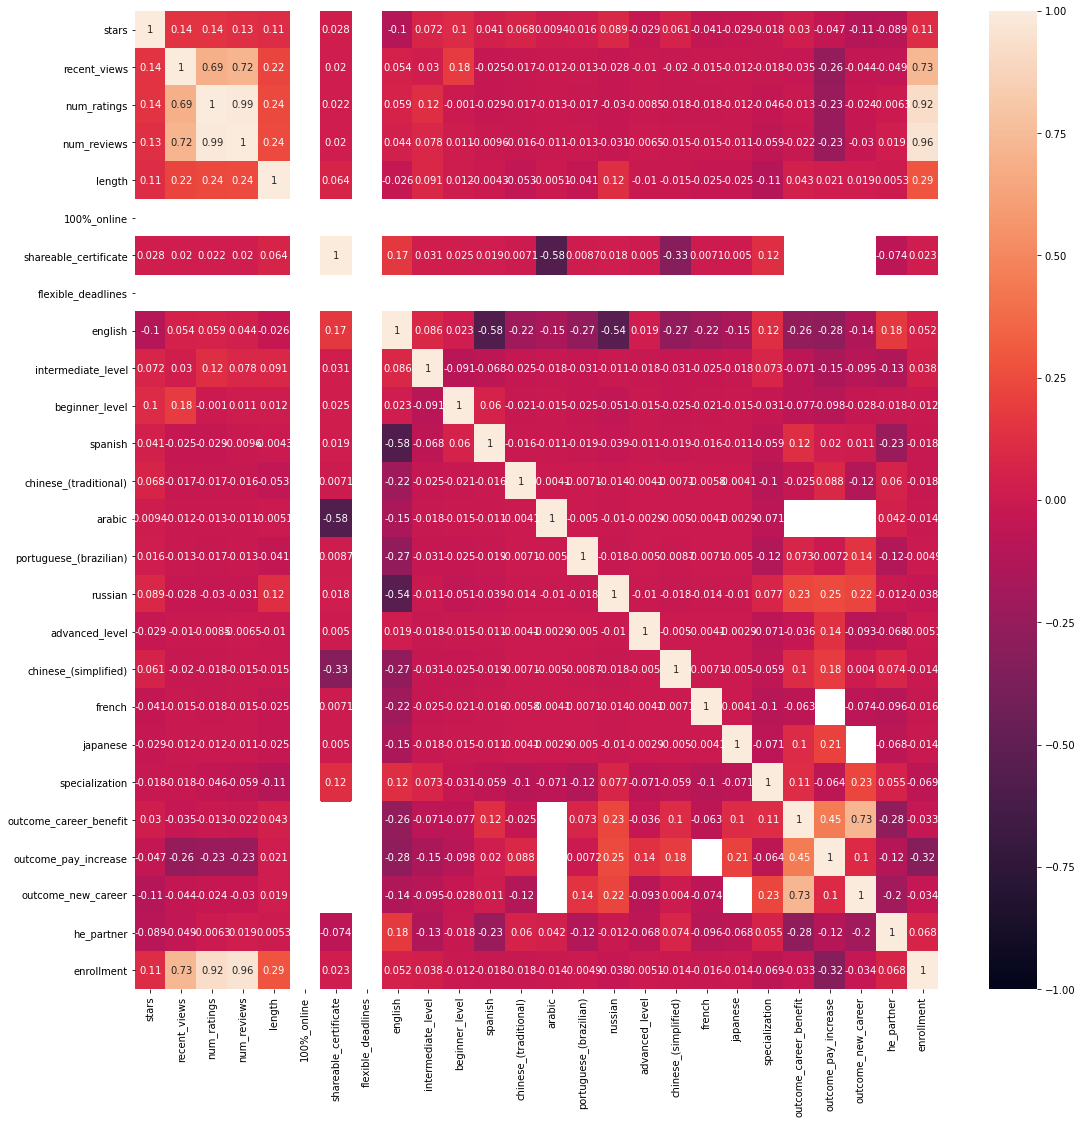

In [6]:
# Correlation heatmap
plt.figure(figsize=(18,18))
sns.heatmap(course.corr(),
            vmin=-1, vmax=1,
            annot=True)

**Key takeaways:**
- enrollment is highly correlated wtih recent views, the number of ratings, and the number reviews
- it is surprising that enrollment is positively correlated with course length
- it is also surprising that enrollment is not correlated with other features, even outcomes

In [7]:
# get all numeric features and plot histograms 
numeric_features = course._get_numeric_data().columns

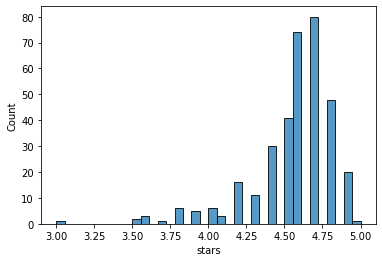

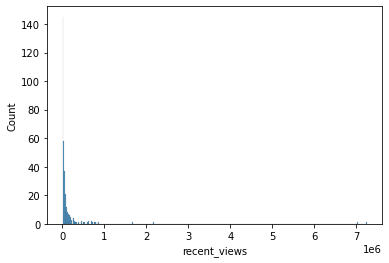

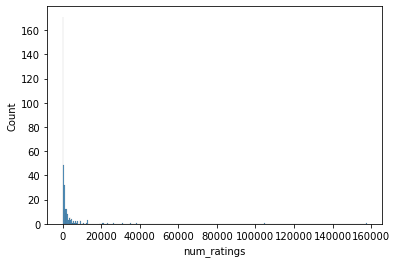

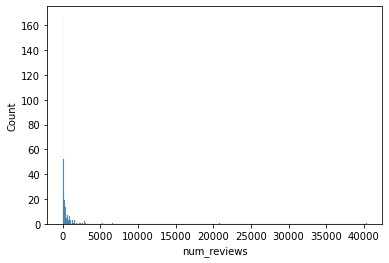

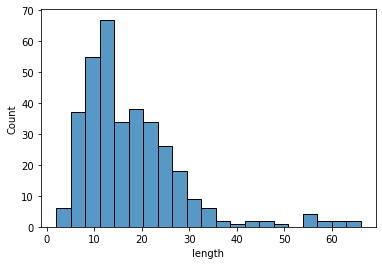

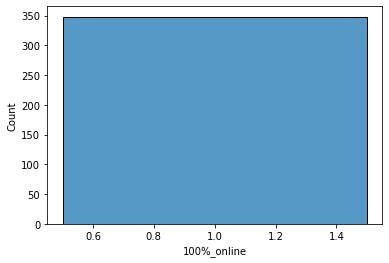

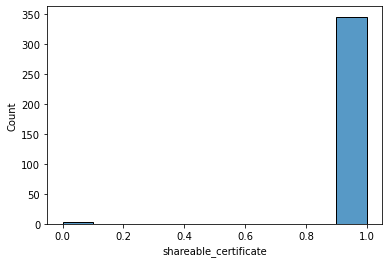

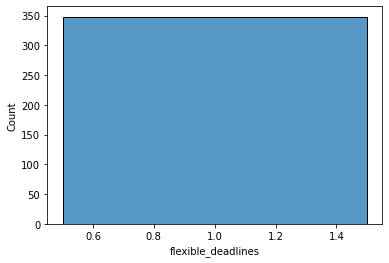

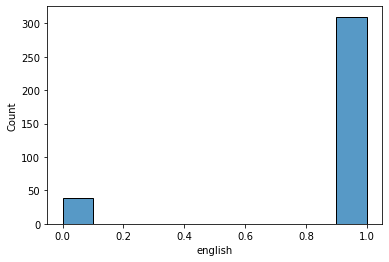

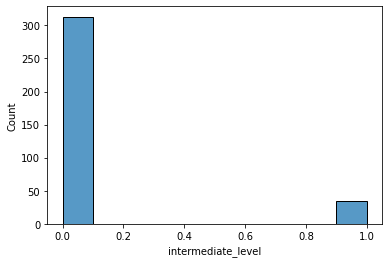

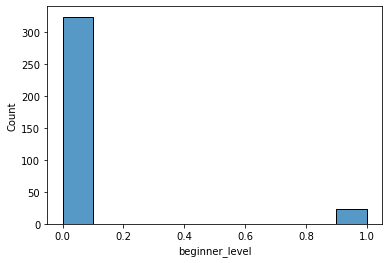

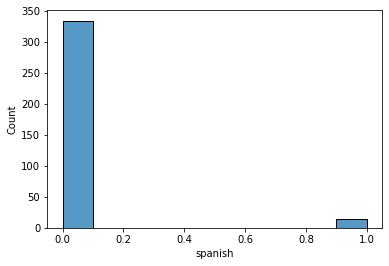

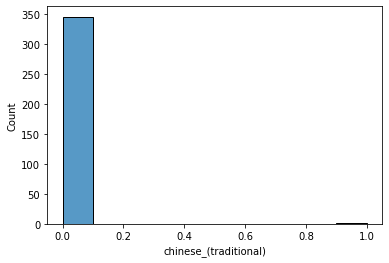

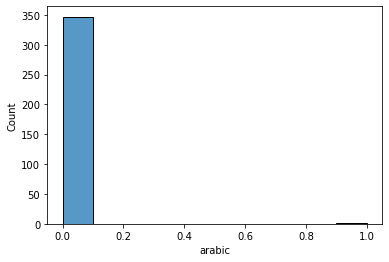

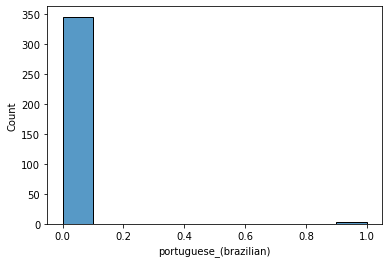

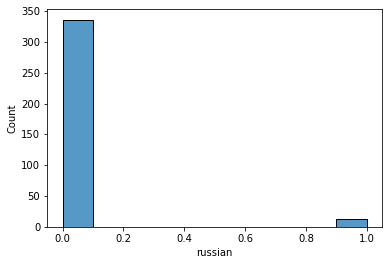

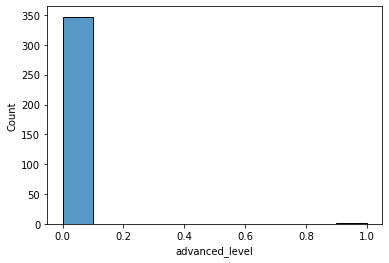

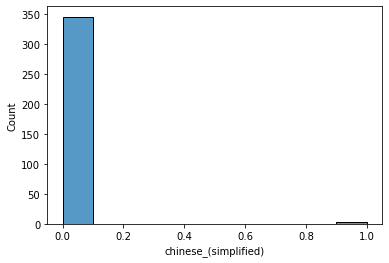

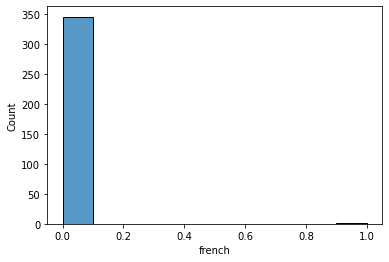

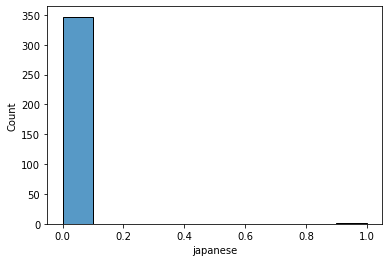

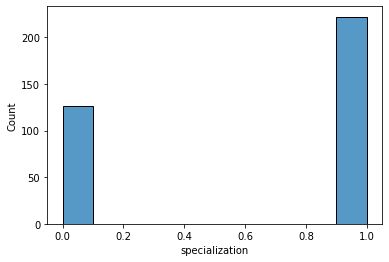

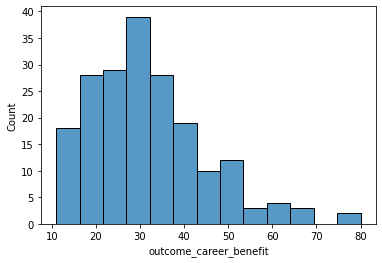

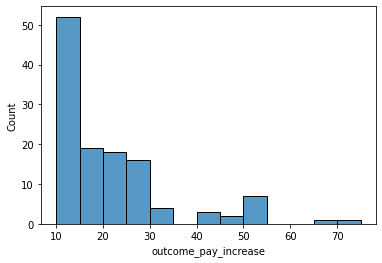

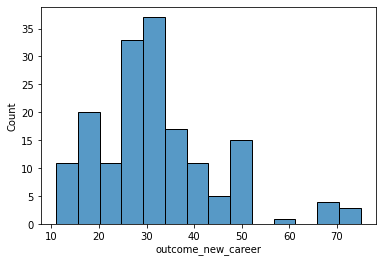

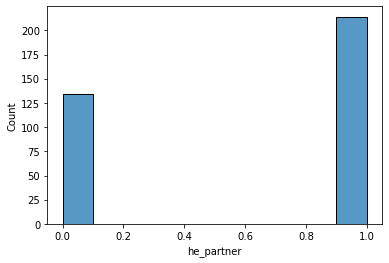

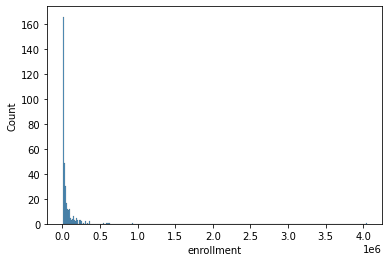

In [8]:
for each in numeric_features:
    sns.histplot(data = course, x = each)
    plt.show()

### Detailed EDA

In [9]:
from scipy.stats import ttest_ind

#### Enrollment

In [10]:
course['enrollment'].describe()

count    3.480000e+02
mean     6.466855e+04
std      2.359023e+05
min      1.585000e+03
25%      6.752000e+03
50%      1.663900e+04
75%      5.461525e+04
max      4.047733e+06
Name: enrollment, dtype: float64

In [11]:
course.sort_values(by='enrollment', ascending=False).head(5)[['course_name', 'course_href', 'enrollment']]

,course_name,course_href,enrollment
50,Machine Learning,/learn/machine-learning,4047733
54,Neural Networks and Deep Learning,/learn/neural-networks-deep-learning,933282
178,The Data Scientist’s Toolbox,/learn/data-scientists-tools,616486
316,R Programming,/learn/r-programming,604890
15,Introduction to Data Science in Python,/learn/python-data-analysis,587430


In [12]:
# set a 75-percentile thredshold 
# courses with enrollment > this thredshold are 'popular courses'

high_enroll_threds = course['enrollment'].quantile(q=0.75)
low_enroll_threds = course['enrollment'].quantile(q=0.25)

#### Partner type in full samples and in top/bottom enrolling samples

In [13]:
course['he_partner'].value_counts(normalize=True)

1    0.614943
0    0.385057
Name: he_partner, dtype: float64

In [14]:
course[course['enrollment']>high_enroll_threds]['he_partner'].value_counts(normalize=True)

1    0.689655
0    0.310345
Name: he_partner, dtype: float64

In [15]:
course[course['enrollment']<low_enroll_threds]['he_partner'].value_counts(normalize=True)

1    0.517241
0    0.482759
Name: he_partner, dtype: float64

In [16]:
# two-sample tt-test to see if these ratios are significantly different
ttest_ind(course[course['enrollment']>high_enroll_threds]['he_partner'], course[course['enrollment']<low_enroll_threds]['he_partner'])

Ttest_indResult(statistic=2.347939631425926, pvalue=0.02001474592352591)

**Key takeways:**
- the ratio of course partner being a higher education institute is higher among popular courses.

#### Specialization in full samples and in top/bottom enrolling samples

In [17]:
course['specialization'].value_counts(normalize=True)

1    0.637931
0    0.362069
Name: specialization, dtype: float64

In [18]:
course[course['enrollment']>high_enroll_threds]['specialization'].value_counts(normalize=True)

1    0.586207
0    0.413793
Name: specialization, dtype: float64

In [19]:
course[course['enrollment']<low_enroll_threds]['specialization'].value_counts(normalize=True)

1    0.643678
0    0.356322
Name: specialization, dtype: float64

In [20]:
ttest_ind(course[course['enrollment']>high_enroll_threds]['specialization'], course[course['enrollment']<low_enroll_threds]['specialization'])

Ttest_indResult(statistic=-0.7758245261711796, pvalue=0.438918042932934)

#### Course length in full samples vs. popular courses

In [21]:
course['length'].mean()

18.011494252873565

In [22]:
course[course['enrollment']>high_enroll_threds]['length'].mean()

22.563218390804597

In [23]:
course[course['enrollment']<high_enroll_threds]['length'].mean()

16.49425287356322

In [24]:
ttest_ind(course[course['enrollment']>high_enroll_threds]['length'], course[course['enrollment']<high_enroll_threds]['length'])

Ttest_indResult(statistic=4.717633277720816, pvalue=3.4678391864894835e-06)

**Key takeaways:**
The most popular courses have longer course durations.

#### EDA - outcomes: `outcome_career_benefit`

In [25]:
course['outcome_career_benefit'].describe()

count    195.000000
mean      31.446154
std       13.046741
min       11.000000
25%       22.500000
50%       29.000000
75%       38.000000
max       80.000000
Name: outcome_career_benefit, dtype: float64

In [26]:
course[course['outcome_career_benefit']>course['outcome_career_benefit'].quantile(q=0.95)]['course_name']

81                                                    Прикладные задачи анализа данных
95                                                     Machine Learning Using SAS Viya
110                    Sequence Models for Time Series and Natural Language Processing
158                                          Capstone: Analyzing (Social) Network Data
166                                                 Communicating Data Science Results
227    Business Applications of Hypothesis Testing and Confidence Interval Estimation 
268                                                       Geodesign: Change Your World
270                                                            Introdução ao Big Data 
305                                                     Advanced Data Science Capstone
310                                                    Анализ данных: финальный проект
Name: course_name, dtype: object

#### EDA - outcomes: `outcome_pay_increase`

In [27]:
course['outcome_pay_increase'].describe()

count    123.000000
mean      20.902439
std       12.493549
min       10.000000
25%       12.000000
50%       17.000000
75%       25.000000
max       75.000000
Name: outcome_pay_increase, dtype: float64

In [28]:
course[course['outcome_pay_increase']>course['outcome_pay_increase'].quantile(q=0.95)]['course_name']

27    Advanced Manufacturing Enterprise
95      Machine Learning Using SAS Viya
Name: course_name, dtype: object

#### EDA - outcomes: `outcome_new_career`

In [29]:
course['outcome_new_career'].describe()

count    168.000000
mean      32.339286
std       12.867278
min       11.000000
25%       24.750000
50%       31.000000
75%       38.000000
max       75.000000
Name: outcome_new_career, dtype: float64

In [30]:
course[course['outcome_new_career']>course['outcome_new_career'].quantile(q=0.95)]['course_name']

81                     Прикладные задачи анализа данных
113         Foundations of strategic business analytics
129    Effective Business Presentations with Powerpoint
166                  Communicating Data Science Results
270                             Introdução ao Big Data 
305                      Advanced Data Science Capstone
310                     Анализ данных: финальный проект
336     Applying Machine Learning to your Data with GCP
Name: course_name, dtype: object

In [36]:
course.iloc[[95, 305]][['course_name', 'outcome_career_benefit', 'outcome_pay_increase', 'outcome_new_career']]

,course_name,outcome_career_benefit,outcome_pay_increase,outcome_new_career
95,Machine Learning Using SAS Viya,67.0,67.0,NaN
305,Advanced Data Science Capstone,57.0,NaN,67.0


In [32]:
# end of notebook